2021-12-01 16:04:47.080744: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-01 16:04:47.080766: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


(28, 28)


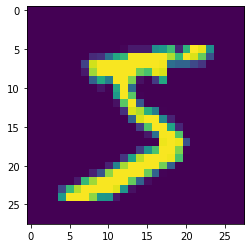

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras import models, layers, utils
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train[0].shape)
plt.imshow(X_train[0])

In [2]:
model = models.Sequential()
model.add(layers.Dense(100, input_dim=28 * 28, activation='tanh'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy')

2021-12-01 16:04:50.722085: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-12-01 16:04:50.722103: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-12-01 16:04:50.722182: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (fedora): /proc/driver/nvidia/version does not exist
2021-12-01 16:04:50.722340: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
trainX = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[1])
testX = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[1])

2021-12-01 16:04:55.194390: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/2
120/120 [==============================] - 0s 2ms/step - loss: 0.7755
Epoch 2/2
120/120 [==============================] - 0s 2ms/step - loss: 0.3816


Text(33.0, 0.5, 'Actual')

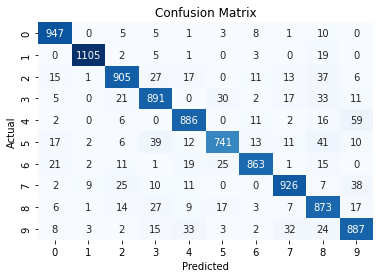

In [4]:
history = model.fit(trainX, y=utils.to_categorical(y_train), batch_size=500, epochs=2)

predictions = model.predict(testX)
cm = confusion_matrix(y_test, np.argmax(predictions,axis=1))

plt.figure()
sns.heatmap(cm, cbar=False, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [5]:
# normalize the data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

meanEst = np.mean(X_train, axis = (0, 1, 2))
stdevEst = np.std(X_train, axis = (0, 1, 2))

X_train = (X_train - meanEst) / stdevEst
X_test = (X_test - meanEst) / stdevEst

Epoch 1/2
120/120 [==============================] - 0s 2ms/step - loss: 0.2571
Epoch 2/2
120/120 [==============================] - 0s 2ms/step - loss: 0.1734


Text(33.0, 0.5, 'Actual')

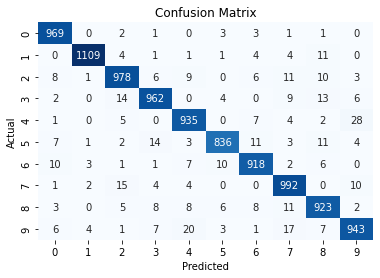

In [6]:
trainX = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[1])
testX = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[1])
history = model.fit(trainX, y=utils.to_categorical(y_train), batch_size=500, epochs=2)

predictions = model.predict(testX)
cm = confusion_matrix(y_test, np.argmax(predictions,axis=1))

plt.figure()
sns.heatmap(cm, cbar=False, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')